In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import QTable, Table, Column
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tsa.ar_model import AutoReg

In [2]:
# Load the data
GSK_2020 = pd.read_csv('data/GSK_2020.csv',index_col=0, parse_dates=True)
JNJ_2020 = pd.read_csv('data/JNJ_2020.csv',index_col=0, parse_dates=True)
MRK_2020 = pd.read_csv('data/MRK_2020.csv',index_col=0, parse_dates=True)
PFE_2020 = pd.read_csv('data/PFE_2020.csv',index_col=0, parse_dates=True)
SNY_2020 = pd.read_csv('data/SNY_2020.csv',index_col=0, parse_dates=True)

In [3]:
#Add log value of price
GSK_2020['log_Adj_Close'] = np.log(GSK_2020['Adj Close'])
JNJ_2020['log_Adj_Close'] = np.log(JNJ_2020['Adj Close'])
MRK_2020['log_Adj_Close'] = np.log(MRK_2020['Adj Close'])
PFE_2020['log_Adj_Close'] = np.log(PFE_2020['Adj Close'])
SNY_2020['log_Adj_Close'] = np.log(SNY_2020['Adj Close'])

In [7]:
GSK_2020['log_Adj_Close'].describe()

count    53.000000
mean      3.675019
std       0.077762
min       3.471195
25%       3.619565
50%       3.678078
75%       3.711305
max       3.819475
Name: log_Adj_Close, dtype: float64

In [8]:
JNJ_2020['log_Adj_Close'].describe()

count    53.000000
mean      4.959115
std       0.049709
min       4.766108
25%       4.944871
50%       4.974524
75%       4.988709
max       5.022055
Name: log_Adj_Close, dtype: float64

In [9]:
MRK_2020['log_Adj_Close'].describe()

count    53.000000
mean      4.379463
std       0.056324
min       4.244707
25%       4.340313
50%       4.379024
75%       4.416557
max       4.485956
Name: log_Adj_Close, dtype: float64

In [10]:
PFE_2020['log_Adj_Close'].describe()

count    53.000000
mean      3.526807
std       0.070054
min       3.285174
25%       3.506145
50%       3.538669
75%       3.576340
max       3.645711
Name: log_Adj_Close, dtype: float64

In [11]:
SNY_2020['log_Adj_Close'].describe()

count    53.000000
mean      3.881070
std       0.069806
min       3.601681
25%       3.855664
50%       3.898532
75%       3.927503
max       3.975186
Name: log_Adj_Close, dtype: float64

Text(0, 0.5, 'Stock Price')

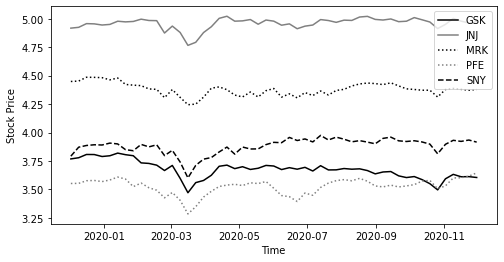

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(GSK_2020['log_Adj_Close'].index, GSK_2020['log_Adj_Close'], color = 'black', label = 'GSK')
plt.plot(GSK_2020['log_Adj_Close'].index, JNJ_2020['log_Adj_Close'], color = 'gray', label = 'JNJ')
plt.plot(GSK_2020['log_Adj_Close'].index, MRK_2020['log_Adj_Close'], color = 'black', label = 'MRK', linestyle=":")
plt.plot(GSK_2020['log_Adj_Close'].index, PFE_2020['log_Adj_Close'], color = 'gray', label = 'PFE', linestyle=":")
plt.plot(GSK_2020['log_Adj_Close'].index, SNY_2020['log_Adj_Close'], color = 'black', label = 'SNY', linestyle="--")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [27]:
# Baseline regression of a simple AR-1 model on the log of Adj_Close
model = AutoReg(GSK_2020.iloc[1:]['log_Adj_Close'], lags=1)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:          log_Adj_Close   No. Observations:                   52
Model:                     AutoReg(1)   Log Likelihood                  93.218
Method:               Conditional MLE   S.D. of innovations              0.039
Date:                Thu, 17 Dec 2020   AIC                             -6.376
Time:                        16:53:48   BIC                             -6.262
Sample:                    12-16-2019   HQIC                            -6.332
                         - 11-30-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.5503      0.261      2.111      0.035       0.039       1.061
log_Adj_Close.L1     0.8493      0.071     11.975      0.000       0.710       0.988
                            

C:\Users\symay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


In [34]:
# Baseline regression of a simple AR-1 model on the log of Adj_Close
model = AutoReg(GSK_2020.iloc[1:]['log_Adj_Close'], exog = GSK_2020.iloc[1:][['Virus','Flu','Vaccine']], lags=1)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:          log_Adj_Close   No. Observations:                   52
Model:                   AutoReg-X(1)   Log Likelihood                 100.616
Method:               Conditional MLE   S.D. of innovations              0.034
Date:                Thu, 17 Dec 2020   AIC                             -6.548
Time:                        16:57:10   BIC                             -6.321
Sample:                    12-16-2019   HQIC                            -6.461
                         - 11-30-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.1064      0.303      3.647      0.000       0.512       1.701
log_Adj_Close.L1     0.7187      0.080      8.991      0.000       0.562       0.875
Virus                0.0013 

C:\Users\symay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


In [36]:
# Baseline regression of a simple AR-1 model on the log of Adj_Close
model = AutoReg(PFE_2020.iloc[1:]['log_Adj_Close'], exog = PFE_2020.iloc[1:][['Virus','Flu','Vaccine']], lags=1)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:          log_Adj_Close   No. Observations:                   52
Model:                   AutoReg-X(1)   Log Likelihood                 100.348
Method:               Conditional MLE   S.D. of innovations              0.034
Date:                Thu, 17 Dec 2020   AIC                             -6.538
Time:                        17:01:52   BIC                             -6.311
Sample:                    12-16-2019   HQIC                            -6.451
                         - 11-30-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.4974      0.335      4.472      0.000       0.841       2.154
log_Adj_Close.L1     0.5699      0.095      6.010      0.000       0.384       0.756
Virus               -0.0023 

C:\Users\symay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
